In [5]:
from IPython.display import Image

## Git Basics

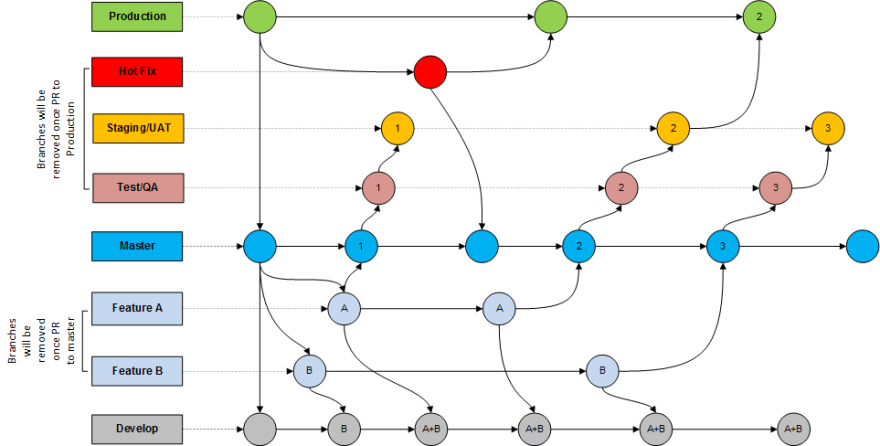

In [10]:
Image('./img/Git-flow.png')

### Table of Contents

* [Config](#config)
* [Getting a Git Repository](#gitrepo)
* [Recording changes](#recordchange)
    * Lifecycle
    * Commands
* [Viewing Commit History](#commithist)
* [Working on Remotes](#remoterepo)
* [Branches](#branchesintro)
* [Branch Management](#branchemgt)

    


### Config <a class="anchor" id="config"></a>

Checking git config:

    git config --list
    
Resource: [Link](https://git-scm.com/book/be/v2/%D0%9F%D0%B5%D1%80%D1%88%D1%8B%D1%8F-%D0%BA%D1%80%D0%BE%D0%BA%D1%96-First-Time-Git-Setup)

### Getting a Git Repository <a class="anchor" id="gitrepo"></a>
##### Option 1
Go to command line and travel to an existing directory of choice, for example

    cd home/user/my_project

initiate git = creates a new subdirectory named .git that contains all of your necessary repository files
NB: Nothing is tracked yet

    git init

To start tracking, add the files to git and commit

    git add *.c
    git add LICENSE
    git commit - m 'Initial project version'

##### Option 2
Copy an existing git repository. The following command copy the entire history or versions of an existing git repo.\
NB: You can rename it directly. Also, the example below is for a local machine, other protocol exist for servers

    git clone https://github.com/libgit2/libgit2 mylibgit

### Recording changes <a class="anchor" id="recordchange"></a>
##### States through lifecycle

   *  Tracked: files included in last git snapshot
       * Unmodified
       * Modified
       * Staged
   *  Untracked: files not included in last snapshot
   
To check the status run:

    git status
    git status -s (short version)

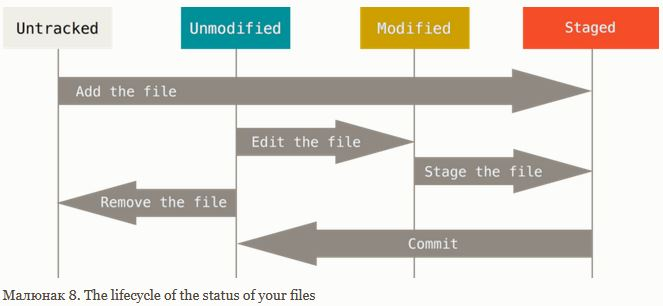

In [8]:
Image("./img/Git lifecycle.jpg")

##### Tracking New Files

    git add file_name

##### Staging modified Files:
git add is a multipurpose command — you use it to begin tracking new files, to stage files, and to do other things like marking merge-conflicted files as resolved.

NB: If you modify a file after you run git add, you have to run git add again to stage the latest version of the file

    git add file_name
    
##### Ignore files:
Often, you’ll have a class of files that you don’t want Git to automatically add or even show you as being untracked. In such case, you create .gitignore


The rules for the patterns you can put in the .gitignore file are as follows:

   * Blank lines or lines starting with # are ignored.

   * Standard glob patterns work, and will be applied recursively throughout the entire working tree.

   * You can start patterns with a forward slash (/) to avoid recursivity.

   * You can end patterns with a forward slash (/) to specify a directory.

   * You can negate a pattern by starting it with an exclamation point (!).
   
Example:

    # ignore all .a files
    *.a

    # but do track lib.a, even though you're ignoring .a files above
    !lib.a

    # only ignore the TODO file in the current directory, not subdir/TODO
    /TODO

    # ignore all files in any directory named build
    build/

    # ignore doc/notes.txt, but not doc/server/arch.txt
    doc/*.txt

    # ignore all .pdf files in the doc/ directory and any of its subdirectories
    doc/**/*.pdf

##### Commit changes:

    git commit (+esc)
    git commit -m "Story 99: fix feature 1"(inline)
    
##### Remove file + Commit deletion:
Follow the sequence of commands below:

    rm File_name
    git status -s (to check if the change has been recorded)
    git rm File_name
    git commit -m 'insert your comment here'
    
##### Moving or Renaming file:
NB: the same command is use for both moving & renaming

    git mv file_from file_to
    git commit -m 'insert your comment here'

### Commit History <a class="anchor" id="commithist"></a>
##### Accessing log:
Repository is printed in REVESERVED chronological order
    git log
 
NB: A huge number and variety of options to the git log command are available to show you exactly what you’re looking for. Here, we’ll show you some of the most popular.

    git log -p -2
    git log --stat
    git log --pretty=oneline
    git log --oneline
    git log --pretty=format:"%h - %an, %ar : %s"
        output example:  "ca82a6d - Scott Chacon, 6 years ago : Change version number"
    git log --since=2.weeks
    git log --until="2021-01-01"
    
Pretty & format can be very useful to scan through last changes commited. 

Format can take the following specifiers:

    %H = Commit hash
    %h = Abbreviated commit hash
    %T = Tree hash
    %t = Abbreviated tree hash
    %P = Parent hashes
    %p = Abbreviated parent hashes
    %an = Author name (NB: author is the person who originally wrote the work)
    %ae = Author email
    %ad = Author date (format respects the --date=option)
    %ar = Author date, relative
    %cn = Committer name (NB: the committer is the person who last applied the work)
    %ce = Committer email
    %cd = Committer date
    %cr = Committer date, relative
    %s = Subject
    
Advanced example of querying commit history:
Criteria: Commits modifying test files in the Git source code history were committed by Junio Hamano in the month of October 2008 and are not merge commits,

    git log --pretty="%h - %s" --author='Junio C Hamano' --since="2008-10-01" \--before="2008-11-01" --no-merges -- t/

### Working with Remotes <a class="anchor" id="remoterepo"></a>

Remote repositories are versions of your project that are hosted on the Internet or network somewhere. 

##### Showing your Remotes:
It lists the shortnames of each remote handle you’ve specified.

    git remote
    git remote - v
    
If you have more than one remote, the command lists them all. This means we can pull contributions from any of these users pretty easily. We may additionally have permission to push to one or more of these, though we can’t tell that here.

##### Adding remote repositories:
NB: you can use the shortname instead of the url

    git remote add <shortname> <url>
        i.e. git remote add uz https://github/uz
        
##### Fetch remote repositories:
Fetch = The command goes out to that remote project and pulls down all the data from that remote project that you don’t have yet. 

NB: It’s important to note that the git fetch command only downloads the data to your local repository — it doesn’t automatically merge it with any of your work or modify what you’re currently working on. You have to merge it manually into your work when you’re ready.

After you do this, you should have references to all the branches from that remote, which you can merge in or inspect at any time.

    git fetch uz
    
##### Pulling remote repositories:
Pull = Fetch + Merge (automatically)
git pull command to automatically fetch and then merge that remote branch into your current branch. 

    git pull uz
    
##### Push to remote repositories:
When you have your project at a point that you want to share, you have to push it upstream.

    git push <remote> <branch>
        i.e; git push origin master
        
This command works only if you cloned from a server to which you have write access and if nobody has pushed in the meantime. If you and someone else clone at the same time and they push upstream and then you push upstream, your push will rightly be rejected. You’ll have to fetch their work first and incorporate it into yours before you’ll be allowed to push.

##### Inspecting remote repositories:
Includes info such as:
   * which remote branches on the server you don’t yet have,
   * which remote branches you have that have been removed from the server, 
   * and multiple local branches that are able to merge automatically with their remote-tracking branch when you run git pull.


    git remote show <remote>

##### Rename and Remove remote:

    git remote rename uz uzam
    git remote remove uz

### Branches <a class="anchor" id="branchesintro"></a>

Branching means you diverge from the main line of development and continue to do work without messing with that main line.

Git encourages workflows that branch and merge often, even multiple times in a day. Understanding and mastering this feature gives you a powerful and unique tool and can entirely change the way that you develop.

##### Creating a new branch:

    git branch <name>
        i.e. git branch testing

NB: You need to switch to the new branch !!

    git checkout <branch name>
        i.e. git checkout testing
    git log --oneline --decorate --graph (to verify in which branch you are = head pointing to branch)
    
Advanced:
    
    git checkout -b <newbranchname> (create a new branch and switch to it automatically)


##### Instantaneity of a new branch:

Because a branch in Git is actually a simple file that contains the 40 character SHA-1 checksum of the commit it points to, branches are cheap to create and destroy. Creating a new branch is as quick and simple as writing 41 bytes to a file (40 characters and a newline).

This is in sharp contrast to the way most older VCS tools branch, which involves copying all of the project’s files into a second directory. This can take several seconds or even minutes, depending on the size of the project, whereas in Git the process is always instantaneous. Also, because we’re recording the parents when we commit, finding a proper merge base for merging is automatically done for us and is generally very easy to do. These features help encourage developers to create and use branches often.

##### Merge request:
Full flow example: [Link](https://git-scm.com/book/be/v2/Git-Branching-Basic-Branching-and-Merging)

    git checkout master (switch to the main commit)
    git merge <branchname> (merge branchname to master)
    
    git branch -d <branchname> (you can delete the old branch if it's not useful anymore)
    
    git status (to check unmerged files)
    

### Branch Management<a class="anchor" id="branchemgt"></a>

The git branch command does more than just create and delete branches. If you run it with no arguments, you get a simple listing of your current branches:

    git branch
    git branch -v (last commit on each branch)
    git branch --merged (Branches that are or aren't yet merged into the branch you're currently on)
    git branch --no-merged
    
##### Changing branch name:

    git branch --move <current_branch_name> <new_branch_name> (on local machine)
    git push --set-upstream origin <new_branch_name> (on remote repo)
    
    git push origin --delete <new_branch_name> (push on remote repo and delete old branch)
    
    
##### TBC